In [1]:
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

from utils import load_data, test, run_experiment
from models import GCN_2, GCN_3, ite_GCN

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = load_data(path="../data/cora/", dataset="cora")

Loading cora dataset...


In [3]:
hidden = 16
dropout = 0.5
lr = 0.01
weight_decay = 5e-4
num_epochs = 200
smooth_fac = 0.5

In [4]:
model0 = GCN_2(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout
)
run_experiment(num_epochs=num_epochs, model=model0, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 2-layer GCN
runrunrun!
Epoch: 0001 loss_train: 2.0595 acc_train: 0.0786 loss_val: 2.0356 acc_val: 0.1000 time: 0.0327s
Epoch: 0002 loss_train: 2.0380 acc_train: 0.1071 loss_val: 2.0177 acc_val: 0.1033 time: 0.0087s
Epoch: 0003 loss_train: 2.0213 acc_train: 0.1000 loss_val: 2.0008 acc_val: 0.1033 time: 0.0074s
Epoch: 0004 loss_train: 2.0070 acc_train: 0.1071 loss_val: 1.9845 acc_val: 0.1033 time: 0.0073s
Epoch: 0005 loss_train: 1.9824 acc_train: 0.1071 loss_val: 1.9690 acc_val: 0.1033 time: 0.0074s
Epoch: 0006 loss_train: 1.9751 acc_train: 0.0571 loss_val: 1.9538 acc_val: 0.1033 time: 0.0072s
Epoch: 0007 loss_train: 1.9451 acc_train: 0.1071 loss_val: 1.9391 acc_val: 0.1033 time: 0.0074s
Epoch: 0008 loss_train: 1.9321 acc_train: 0.1000 loss_val: 1.9248 acc_val: 0.1033 time: 0.0066s
Epoch: 0009 loss_train: 1.9216 acc_train: 0.1143 loss_val: 1.9110 acc_val: 0.1367 time: 0.0070s
Epoch: 0010 loss_train: 1.9084 acc_train: 0.2643 loss_val: 1.8977 acc_val: 0.4833 time: 0.0070s
Epoch

In [5]:
model1 = GCN_3(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
run_experiment(num_epochs=num_epochs, model=model1, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 3-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9753 acc_train: 0.1714 loss_val: 1.9736 acc_val: 0.1567 time: 0.0123s
Epoch: 0002 loss_train: 1.9357 acc_train: 0.2714 loss_val: 1.9458 acc_val: 0.1567 time: 0.0093s
Epoch: 0003 loss_train: 1.9219 acc_train: 0.2000 loss_val: 1.9180 acc_val: 0.1567 time: 0.0092s
Epoch: 0004 loss_train: 1.9023 acc_train: 0.1857 loss_val: 1.8913 acc_val: 0.1567 time: 0.0086s
Epoch: 0005 loss_train: 1.8717 acc_train: 0.2000 loss_val: 1.8659 acc_val: 0.1567 time: 0.0113s
Epoch: 0006 loss_train: 1.8435 acc_train: 0.2500 loss_val: 1.8421 acc_val: 0.4300 time: 0.0102s
Epoch: 0007 loss_train: 1.8334 acc_train: 0.3000 loss_val: 1.8206 acc_val: 0.3500 time: 0.0112s
Epoch: 0008 loss_train: 1.8437 acc_train: 0.2786 loss_val: 1.8027 acc_val: 0.3500 time: 0.0116s
Epoch: 0009 loss_train: 1.8142 acc_train: 0.2857 loss_val: 1.7888 acc_val: 0.3500 time: 0.0082s
Epoch: 0010 loss_train: 1.8109 acc_train: 0.2929 loss_val: 1.7794 acc_val: 0.3500 time: 0.0159s
Epoch

In [6]:
model2 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model2, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9471 acc_train: 0.0929 loss_val: 1.8750 acc_val: 0.3500 time: 0.4257s
Epoch: 0002 loss_train: 1.8789 acc_train: 0.2929 loss_val: 1.7923 acc_val: 0.3500 time: 0.3923s
Epoch: 0003 loss_train: 1.7952 acc_train: 0.2929 loss_val: 1.7792 acc_val: 0.3500 time: 0.3917s
Epoch: 0004 loss_train: 1.7834 acc_train: 0.2929 loss_val: 1.7456 acc_val: 0.3500 time: 0.3786s
Epoch: 0005 loss_train: 1.7301 acc_train: 0.2929 loss_val: 1.7184 acc_val: 0.3500 time: 0.3853s
Epoch: 0006 loss_train: 1.6764 acc_train: 0.2929 loss_val: 1.6297 acc_val: 0.3500 time: 0.4092s
Epoch: 0007 loss_train: 1.5781 acc_train: 0.2929 loss_val: 1.5306 acc_val: 0.3500 time: 0.3902s
Epoch: 0008 loss_train: 1.4643 acc_train: 0.3071 loss_val: 1.4384 acc_val: 0.4433 time: 0.364

In [7]:
model3 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 3,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model3, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9466 acc_train: 0.1143 loss_val: 1.8128 acc_val: 0.3500 time: 0.6725s
Epoch: 0002 loss_train: 1.8246 acc_train: 0.2929 loss_val: 2.3912 acc_val: 0.3500 time: 0.6680s
Epoch: 0003 loss_train: 2.4663 acc_train: 0.2929 loss_val: 1.8360 acc_val: 0.1567 time: 0.8047s
Epoch: 0004 loss_train: 1.8142 acc_train: 0.2000 loss_val: 1.9117 acc_val: 0.1567 time: 0.9152s
Epoch: 0005 loss_train: 1.8981 acc_train: 0.2000 loss_val: 1.9205 acc_val: 0.1567 time: 0.6432s
Epoch: 0006 loss_train: 1.9127 acc_train: 0.2071 loss_val: 1.9131 acc_val: 0.1567 time: 0.6784s
Epoch: 0007 loss_train: 1.9030 acc_train: 0.2000 loss_val: 1.8972 acc_val: 0.1567 time: 0.9285s
Epoch: 0008 loss_train: 1.8855 acc_train: 0.2000 loss_val: 1.8660 acc_val: 0.1567 time: 0.760

In [8]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model2.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  2 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.3881 accuracy= 0.7450
inference time:  0.06359386444091797
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 0.6608 accuracy= 0.7760
inference time:  0.11633896827697754
Initialize a 1-layer GCN with  2 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.9621 accuracy= 0.7720
inference time:  0.18796586990356445
Initialize a 1-layer GCN with  2 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 9.5808 accuracy= 0.7510
inference time:  0.2285628318786621
Initialize a 1-layer GCN with  2 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 44.6107 accuracy= 0.73

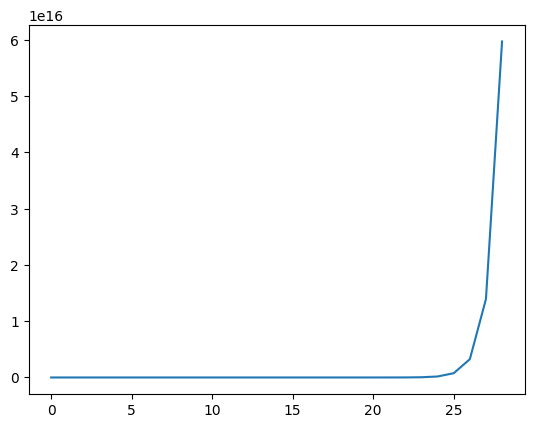

In [9]:
import matplotlib.pyplot as plt
plt.plot(test_losses)

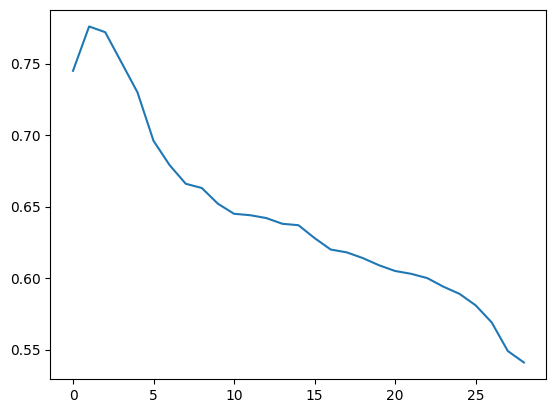

In [10]:
plt.plot(test_accuracies)

In [11]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 3,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model3.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  3 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.6817 accuracy= 0.6730
inference time:  0.052764177322387695
Initialize a 1-layer GCN with  3 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.5051 accuracy= 0.4200
inference time:  0.1039586067199707
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 0.8677 accuracy= 0.7820
inference time:  0.16100573539733887
Initialize a 1-layer GCN with  3 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 10.8486 accuracy= 0.4670
inference time:  0.2127828598022461
Initialize a 1-layer GCN with  3 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 11.1527 accuracy= 0.7

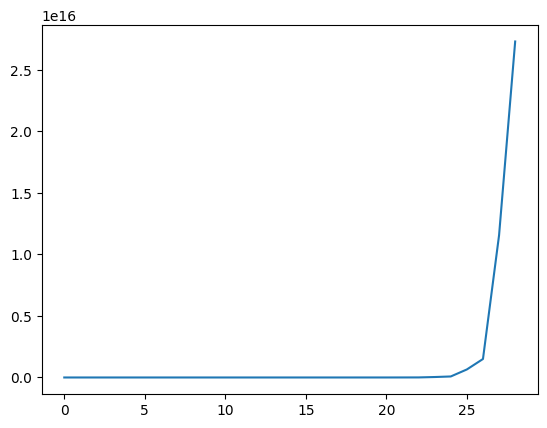

In [12]:
plt.plot(test_losses)

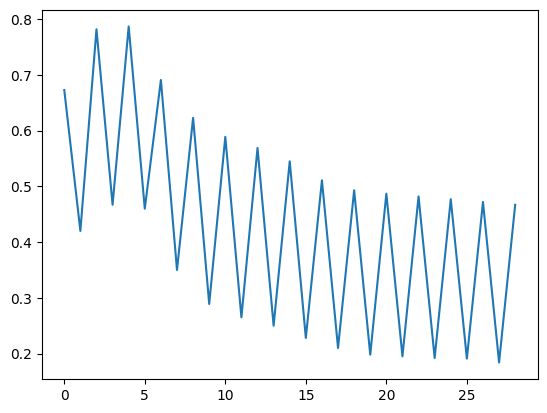

In [13]:
plt.plot(test_accuracies)